## Introduction
<p>As mobile phones start playing an increasingly important role in our lives, their functionalities are no longer limited to basic tasks such as making phone calls or browsing content. More and more companies are developing mobile applications that are either brand new, or couple with existing products such as websites. Whether its recreational or practical, the goal of most applications is to reach as many users as possible, and transform them into long term clients through inhancing user experience. This report uses data on google store apps to analyze the factors that influence an app's rating.<p>

## Dataset Description
### Motivation
<p>This dataset was created for the purpose of analyzing factors that influence an app's ratings and the number of times it is installed.It was cleaned and processed by Amy Cui, with original data from Lavanya Gupta on Kaggle. The collection of this dataset wasn't funded by any third party.<p>


### Composition    
<p>This dataset has several types of instances:App, Category, Rating, Reviews, Size, Intalls, Type, and Price. These types has the following representations:<p>

- App: the name of an app
- Category: The primary category that the app belongs to
- Rating: the average rating of the app (as when scraped)
- Reviews: the number of reviews that an app has (as when scraped)
- Size:The size of the app (as when scraped)
- Installs: the number of times the app has been installed (as when scraped)
- Type: whether the app is free or paid (as when scraped)
- Price: the price of the app (as when scraped)
- Content Rating: indicates the minimum maturity level of content in apps

<p>There are 12074 instances of data in total, and each instance contains the types mentioned above. There exists partially missing data for some instances because the information wasn’t available on the Zomato webpage. <p>
<p>The dataset is self-contained and doesn’t link to any external sources. All data in this dataset is publicly available information from the restaurant descriptions on Zomato. It doesn't contain any confidential or triggering information, nor is it related to people.<p>

### Collection Process
<p>The original dataset was downloaded from Kaggle and then cleaned for analysis. The original data associated with each instance is directly observable in Google Play Store and collected using a web scraping script. The original data was collected by Lavanya Gupta about 2 years ago. The data was downloaded from Kaggle on 11/18/2020, which means it doesn't accurately reflect up-to-date information in Google Play Store now.<p>

### Preprocessing/cleaning/labeling
<p>The orginial data was processed to drop all instances that did not contain any information on rating. An instance was also dropped because errors were found in its fields. In addition, the Rating, Reviews, Size, and Installs columns were all transformed into numeric variables for further calculations and analysis. The code used to clean the data can be found in the appendix. The raw data is stored on https://cornell.box.com/s/y6tfrk7qchnn0nu2bo4zqz3g0fvx9ha1 <p>

### Uses
<p>This dataset has not been used for any tasks. It is accessible through the repository https://github.com/AmyCui2333/info2950. This dataset can be used to study android app features and how they affect popularity of an app. It may not be used for commercial purposes. The raw data was collected about two years ago so it may not be accurate for analysis on current apps.<p>

### Preregistration Statement
1. Do paid apps tend to have higher ratings than free apps?
2. Does the category of an app influence ratings of that app? Perform a linear regression to model the relationship between category and app rating.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.cluster import KMeans

apps = pd.read_csv("googleapps.csv")
print(apps)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                            Paper flowers instructions       ART_AND_DESIGN   
6               Smoke Effect Photo Maker - Smoke Editor       ART_AND_DESIGN   
7                                      Infinite Painter       ART_AND_DESIGN   
8                                  Garden Coloring Book       ART_AND_DESIGN   
9                         Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
10                              Text on Photo - Fonteee       ART_AND_DESIGN   
11              Name Art Photo Editor - 

## Data analysis
We first look at the distribution of the response variable Rating.

In [2]:
mean_rating = apps['Rating'].mean()
print("rating mean: "+"{:.2f}".format(mean_rating))
median_rating = apps['Rating'].median()
print("rating median: "+str(median_rating))

rating mean: 4.17
rating median: 4.3


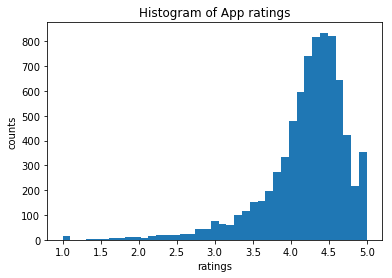

In [3]:
ratings = apps.Rating.values
rating_bins = apps["Rating"].nunique()
n,bins, patches = plt.hist(ratings, rating_bins)
plt.xlabel("ratings")
plt.ylabel("counts")
plt.title('Histogram of App ratings')
plt.show()

As shown in the plot above, app ratings are skewed to the left, clustering around the median of 4.3.This means that most apps have a rating around 4.3, with declining counts as the rating increases or decreases. This is inline with what we would expect out of app store ratings because most apps, on average, would receive a decent but not 

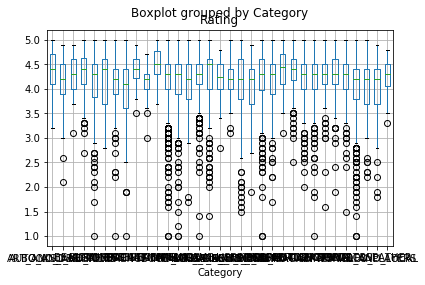

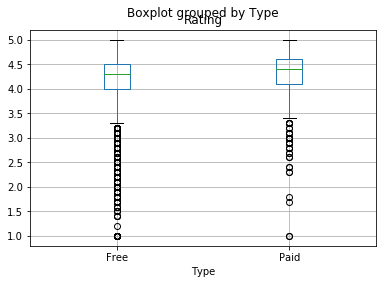

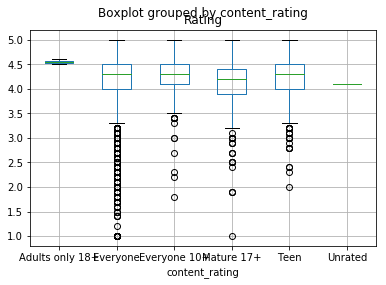

In [4]:
apps.boxplot(column=["Rating"], by = "Category")
apps.boxplot(column=["Rating"], by = "Type")
apps.boxplot(column=["Rating"], by = "content_rating")

regression slope of number of installs to ratings: 0.257


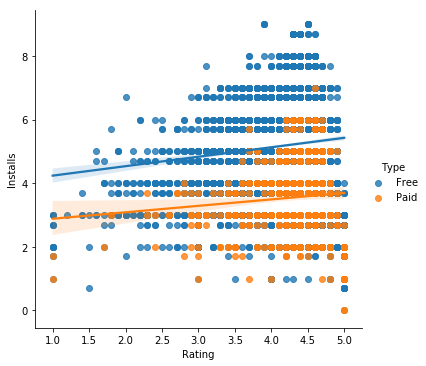

In [5]:
ratings = apps[["Rating"]]
installs = apps[["Installs"]]
sns.lmplot(x="Rating", y="Installs", hue="Type",data=apps)
model=LinearRegression()
model.fit(ratings,installs)
slope = model.coef_[0][0]
print("regression slope of number of installs to ratings: "+"{:.3f}".format(slope))

In [6]:
type_dummies = pd.get_dummies(apps["Type"])
apps=pd.concat([apps.copy(),type_dummies], axis=1)
type_names = list(type_dummies.columns) 
category_dummies = pd.get_dummies(apps["Category"])
apps=pd.concat([apps.copy(),category_dummies], axis=1)
category_names = list(category_dummies.columns) 
content_dummies = pd.get_dummies(apps["content_rating"])
apps=pd.concat([apps.copy(),content_dummies], axis=1)
content_names = list(content_dummies.columns) 

In [7]:
x = apps[category_names]
y = apps["Rating"]
model=LinearRegression()
model.fit(x,y)
rating_slope = model.coef_[0]
print(model.score(x, y))

0.03161957827749773


0.0719822023186012
cluster centers of apps
[[4.22160332 6.16969439]
 [4.10447477 3.44625434]]


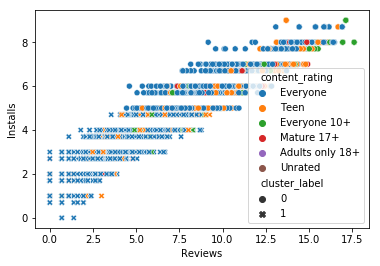

In [8]:
x = apps[['Free','Paid']]
y = apps["Installs"]
model=LinearRegression()
model.fit(x,y)
rating_slope = model.score(x,y)
print(rating_slope)
clustering = KMeans(n_clusters = 2)
clustering.fit(apps[["Rating", "Installs"]])
print("cluster centers of apps\n" + str(clustering.cluster_centers_))
cluster_labels=clustering.labels_
apps["cluster_label"]=cluster_labels
sns.scatterplot(x="Reviews", y="Installs", hue="content_rating",style = "cluster_label",data=apps);

In [9]:
x = apps[['Reviews']]
y = apps["Rating"]
model=LinearRegression()
model.fit(x,y)
rating_slope = model.score(x,y)
print(rating_slope)

0.03235941978990842
